Prototype downsampling process

In [1]:
% cd /home/mayu-ot/durga/Experiments/loc_iparaphrasing/

/mnt/fs1/mayu-ot/Experiments/loc_iparaphrasing


In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import random

def lang_iou(x, y):
    x = set(x.split('+'))
    y = set(y.split('+'))
    inter = x.intersection(y)
    union = x.union(y)
    iou = len(inter) / len(union)
    return iou
        
def downsample_easynegatives(df):
    p_ious = []
    for _, row in df.iterrows():
        p_iou = lang_iou(row.phrase1, row.phrase2)
        p_ious.append(p_iou)
    easy_pos, = np.where(np.logical_and(test_df.ytrue==True, test_df.p_ious==0))
    easy_neg, = np.where(np.logical_and(test_df.ytrue==False, test_df.p_ious==0))
    
    random.sample(easy_neg, len(easy_pos))

In [4]:
df = pd.read_csv('data/phrase_pair_train.csv')
p_ious = []
for _, row in df.iterrows():
    p_iou = lang_iou(row.phrase1, row.phrase2)
    p_ious.append(p_iou)

p_ious = np.asarray(p_ious)
easy_pos, = np.where(np.logical_and(df.ytrue==True, p_ious==0))
easy_neg, = np.where(np.logical_and(df.ytrue==False, p_ious==0))

random.seed(1234)
drop_items = random.sample(easy_neg.tolist(), len(easy_neg) - len(easy_pos))

In [22]:
df_ = df.drop(drop_items)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf78afd5c0>]],
      dtype=object)

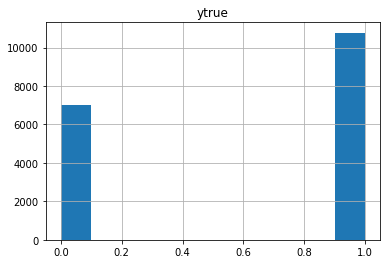

In [29]:
df_.hist(column='ytrue')

In [9]:
df['p_iou'] = p_ious
df.to_csv('data/phrase_pair_train_wt_pious.csv')

In [10]:
df.head()

,Unnamed: 0,image,phrase1,phrase2,original_phrase1,original_phrase2,ytrue,roi1,roi2,p_iou
0,0,3359636318,two+people,group+people,Two people,A group of people,False,45,45,0.333333
1,1,3359636318,two+people,stores,Two people,some stores,False,45,41,0.000000
2,2,3359636318,video+game+shop,group+people,the video game shop,A group of people,False,18,45,0.000000
3,3,3359636318,video+game+shop,stores,the video game shop,some stores,False,18,41,0.000000
4,4,3359636318,mobile+phone+store,group+people,the mobile phone store,A group of people,False,41,45,0.000000
